# First Name:Yanqing
# Last Name: Zhong

# Import Libraries  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Import Data

In [3]:
bottle=pd.read_csv('bottle.csv',low_memory=False)
pd.set_option('display.float_format',lambda x:'%f'%x)
print(len(bottle)) #number of rows (observations)

864863


# Data management 

In [4]:
# Convert variable to numeric
bottle['SiO3uM']=pd.to_numeric(bottle['SiO3uM'],errors='coerce')
bottle['NO3uM']=pd.to_numeric(bottle['NO3uM'],errors='coerce')

# Convert Quality code to numeric
bottle['SiO3qu']=pd.to_numeric(bottle['SiO3qu'],errors='coerce')
bottle['NO3q']=pd.to_numeric(bottle['NO3q'],errors='coerce') 

In [5]:
# Converts "Date" column to datetime format
bottle['Date']=pd.to_datetime(bottle['Date'])

In [6]:
# Replace null values
bottle['SiO3qu'].replace('null', np.nan, inplace=True)
bottle['NO3q'].replace('null', np.nan, inplace=True)

# Create a subset 

### Depth from 80-100 meter in 2013, selecting only silicate, and Nitrate's values both 
### from OK Date and data taken from a CTD device

In [7]:
sub1 = bottle[(bottle['Date'].dt.year == 2013) & 
              (bottle['Depthm'] > 80) & (bottle['Depthm'] <= 100) & 
              ((bottle['SiO3qu'].isnull()) | (bottle['SiO3qu'] == 6))&
              ((bottle['NO3q'].isnull()) | (bottle['NO3q'] == 6))]

In [8]:
sub2=sub1.copy()
print(len(sub2))

489


# Linear Regression

In [9]:
sub2['SiO3uM'].dropna(inplace=True)
sub2['NO3uM'].dropna(inplace=True)

<IPython.core.display.Javascript object>


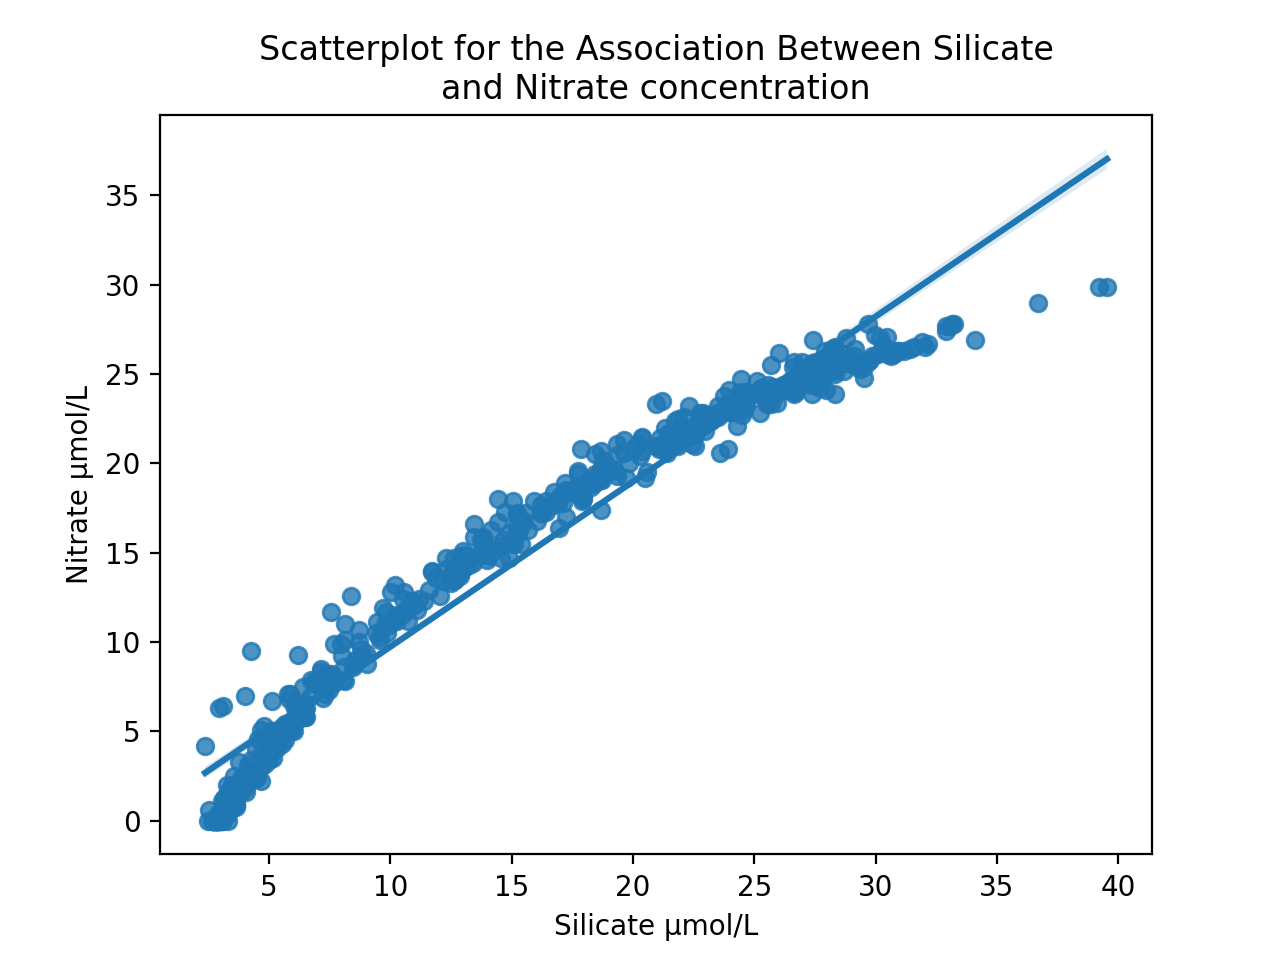

Text(0.5, 1.0, 'Scatterplot for the Association Between Silicate\nand Nitrate concentration')

In [10]:
%matplotlib notebook
scat1 = sns.regplot(x="SiO3uM", y="NO3uM", fit_reg=True, data=sub2)
plt.xlabel('Silicate μmol/L')
plt.ylabel('Nitrate μmol/L')
plt.title('Scatterplot for the Association Between Silicate' + '\n' + 'and Nitrate concentration')

In [11]:
import statsmodels.formula.api as smf
print ("OLS regression model for the association Between Silicate and Nitrate concentration")
reg1 = smf.ols('NO3uM ~ SiO3uM', data=sub2).fit()
print (reg1.summary())

OLS regression model for the association Between Silicate and Nitrate concentration
                            OLS Regression Results                            
Dep. Variable:                  NO3uM   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     9730.
Date:                Wed, 03 May 2023   Prob (F-statistic):          4.94e-324
Time:                        14:48:21   Log-Likelihood:                -1016.6
No. Observations:                 489   AIC:                             2037.
Df Residuals:                     487   BIC:                             2046.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

<IPython.core.display.Javascript object>


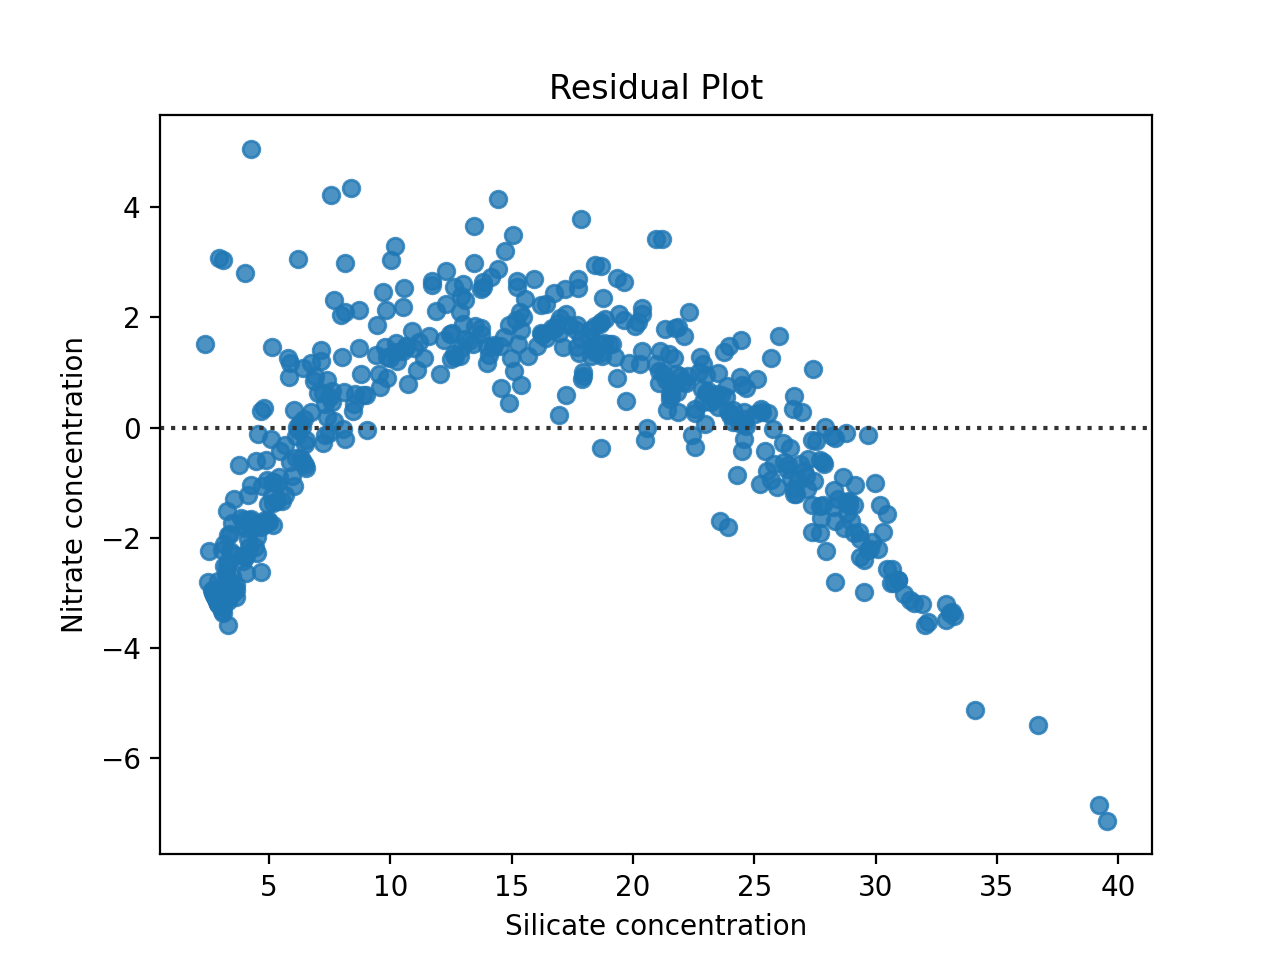

Text(0.5, 1.0, 'Residual Plot')

In [12]:
%matplotlib notebook
scat1 = sns.residplot(x="SiO3uM", y="NO3uM",  data=sub2)
plt.xlabel('Silicate concentration')
plt.ylabel('Nitrate concentration')
plt.title('Residual Plot')